In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay, precision_recall_curve

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


In [4]:
titanic['Parents/Children Aboard'].value_counts()

0    674
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parents/Children Aboard, dtype: int64

In [5]:
titanic['Siblings/Spouses Aboard'].value_counts()

0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings/Spouses Aboard, dtype: int64

In [6]:
### Examine missing data
total = titanic.isnull().sum().sort_values(ascending=False)

total

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [7]:
# remove name
titanic = titanic.drop(columns=['Name'])

In [8]:
titanic.shape

(887, 7)

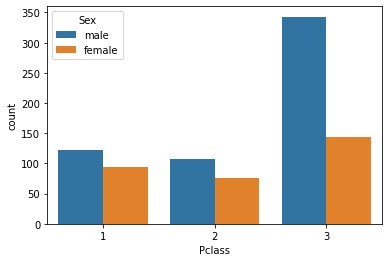

In [9]:
## Visualize relationship between sex and class
ax = sns.countplot(x="Pclass", hue='Sex', data=titanic)

### Observations:
* Most people in the third class are males. 
* There are more males than females across all classes

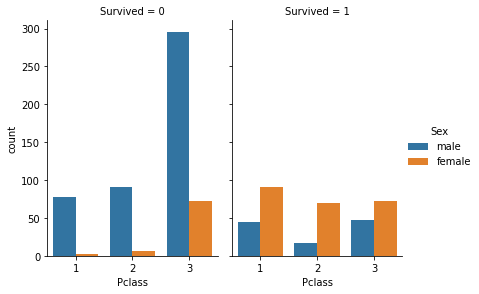

In [10]:
### Visualize the relationship between gender, class, and survival
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=titanic, kind="count",
                height=4, aspect=.7)

### Observations: 
* Predominantly people that did not survive in the first class were males. 
* In general, females had a higher chance of survival than males across all classes. 

C:\Users\lpeng\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 21.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


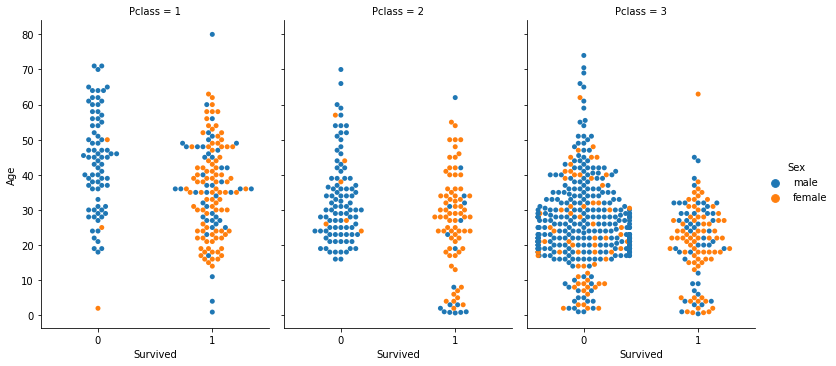

In [11]:
sns.catplot(x="Survived", y="Age", hue="Sex",
            col="Pclass", aspect=.7,
            kind="swarm", data=titanic)

### Observations:
* For people in the second class, most males did not survive. Those that survived were mostly children or middle-age adults. 
* For people in the third class, female children and male children had relatively equal chances of survival. 
* For people in the third class, most people who survived were females who were less than thirty-five years old. 

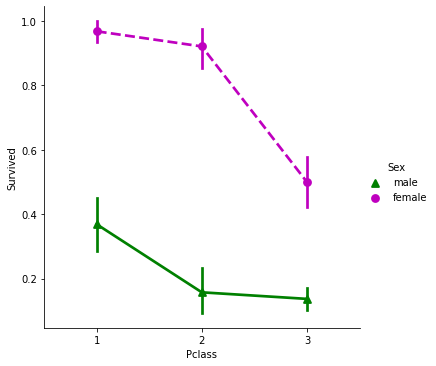

In [12]:
sns.catplot(x="Pclass", y="Survived", hue="Sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic)

### Observations:
* Here, we could also see that females in general have a higher survival rate than males. 

In [13]:
titanic['total_relatives'] = titanic['Siblings/Spouses Aboard'] + titanic['Parents/Children Aboard']

titanic.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,total_relatives
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1


C:\Users\lpeng\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\lpeng\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


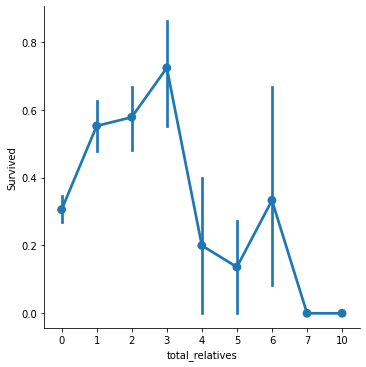

In [14]:
axes = sns.factorplot('total_relatives','Survived', 
                      data=titanic)

### Observations:
* If you have 1-3 relatives, you have a relatively high chances survivial. But if you have more than that, then your chances of survivial decreased. 

In [15]:
# assign an integer value of sex
def assign_sex_integer(row):
    if row['Sex'] == 'male':
        return 1
    else:
        return 0

# call the assign_gender_integer method to assign 1 to male and 0 to female
titanic['Sex'] = titanic.apply(assign_sex_integer, axis=1)

In [16]:
titanic.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,total_relatives
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,1


## Build Machine Learning models



In [17]:
# Import the Sequential API
import keras 
from keras.models import Sequential 
from keras.layers import Dense

model = Sequential()

In [18]:
X=titanic.drop(['Survived'], axis=1)
Y=titanic['Survived']

In [19]:
X.astype(np.float32)

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,total_relatives
0,3.0,1.0,22.0,1.0,0.0,7.250000,1.0
1,1.0,0.0,38.0,1.0,0.0,71.283302,1.0
2,3.0,0.0,26.0,0.0,0.0,7.925000,0.0
3,1.0,0.0,35.0,1.0,0.0,53.099998,1.0
4,3.0,1.0,35.0,0.0,0.0,8.050000,0.0
...,...,...,...,...,...,...,...
882,2.0,1.0,27.0,0.0,0.0,13.000000,0.0
883,1.0,0.0,19.0,0.0,0.0,30.000000,0.0
884,3.0,0.0,7.0,1.0,2.0,23.450001,3.0
885,1.0,1.0,26.0,0.0,0.0,30.000000,0.0


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [21]:
n_cols = X.shape[1]

In [22]:
# split the data between training and testing

# Add the first layer with 15 nodes
input_layer = Dense(units = 15, activation='relu', input_shape = (n_cols,)) 
model.add(input_layer) 

# # Add the second layer with 25 nodes
hidden_layer = Dense(units = 25, activation='relu') 
model.add(hidden_layer)

# We could also add drop out layer
#Dropout is a technique used to prevent a model from overfitting. 
#Dropout works by randomly setting the outgoing edges of hidden units (neurons that make up hidden layers) to 0 at each update of the training phase.


# # Add the output layer
model.add(Dense(1, activation='sigmoid'))

# view model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                120       
                                                                 
 dense_1 (Dense)             (None, 25)                400       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 546
Trainable params: 546
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# we use 'categorical crossentropy' for multi-class classification; mean squared error is a common choice for regression problem
# optimizer determines learning rate. It adjusts the learning rate during gradient descent and ensures reasonable values for the weights during the weight optimization process 

# Define early_stopping_monitor
# here, we set the number of epochs the model can take without improving rate. 
early_stopping_monitor = EarlyStopping(patience=25)

# history = model.fit(X_train, Y_train, epochs=20, batch_size=30)
history = model.fit(X_train, Y_train, epochs=100, batch_size=5, validation_split= 0.1, callbacks=[early_stopping_monitor], verbose=2)

Epoch 1/100
112/112 - 1s - loss: 0.6568 - accuracy: 0.6774 - val_loss: 0.5760 - val_accuracy: 0.6935 - 720ms/epoch - 6ms/step
Epoch 2/100
112/112 - 0s - loss: 0.6006 - accuracy: 0.6810 - val_loss: 0.5869 - val_accuracy: 0.6935 - 108ms/epoch - 965us/step
Epoch 3/100
112/112 - 0s - loss: 0.6101 - accuracy: 0.6703 - val_loss: 0.6763 - val_accuracy: 0.4839 - 186ms/epoch - 2ms/step
Epoch 4/100
112/112 - 0s - loss: 0.6256 - accuracy: 0.6918 - val_loss: 0.6129 - val_accuracy: 0.6129 - 133ms/epoch - 1ms/step
Epoch 5/100
112/112 - 0s - loss: 0.5897 - accuracy: 0.6846 - val_loss: 0.5615 - val_accuracy: 0.6935 - 93ms/epoch - 830us/step
Epoch 6/100
112/112 - 0s - loss: 0.5650 - accuracy: 0.7061 - val_loss: 0.5655 - val_accuracy: 0.7097 - 109ms/epoch - 971us/step
Epoch 7/100
112/112 - 0s - loss: 0.5697 - accuracy: 0.6971 - val_loss: 0.5517 - val_accuracy: 0.7097 - 97ms/epoch - 869us/step
Epoch 8/100
112/112 - 0s - loss: 0.5801 - accuracy: 0.6989 - val_loss: 0.5426 - val_accuracy: 0.7097 - 105ms/epo

Epoch 66/100
112/112 - 0s - loss: 0.4257 - accuracy: 0.8262 - val_loss: 0.4664 - val_accuracy: 0.7903 - 136ms/epoch - 1ms/step
Epoch 67/100
112/112 - 0s - loss: 0.5110 - accuracy: 0.7975 - val_loss: 0.3931 - val_accuracy: 0.8226 - 150ms/epoch - 1ms/step
Epoch 68/100
112/112 - 0s - loss: 0.4292 - accuracy: 0.8208 - val_loss: 0.4015 - val_accuracy: 0.7903 - 134ms/epoch - 1ms/step
Epoch 69/100
112/112 - 0s - loss: 0.4275 - accuracy: 0.8136 - val_loss: 0.3963 - val_accuracy: 0.8387 - 146ms/epoch - 1ms/step
Epoch 70/100
112/112 - 0s - loss: 0.4249 - accuracy: 0.8208 - val_loss: 0.3996 - val_accuracy: 0.8226 - 139ms/epoch - 1ms/step
Epoch 71/100
112/112 - 0s - loss: 0.4154 - accuracy: 0.8208 - val_loss: 0.4195 - val_accuracy: 0.7581 - 141ms/epoch - 1ms/step
Epoch 72/100
112/112 - 0s - loss: 0.4395 - accuracy: 0.8029 - val_loss: 0.3969 - val_accuracy: 0.8226 - 141ms/epoch - 1ms/step
Epoch 73/100
112/112 - 0s - loss: 0.4197 - accuracy: 0.8208 - val_loss: 0.4282 - val_accuracy: 0.8065 - 142ms/e

In [24]:
# evaluate the keras model on training data
_, accuracy = model.evaluate(X_train, Y_train)
print('Accuracy: %.2f' % (accuracy * 100))

20/20 [==============================] - 0s 1ms/step - loss: 0.4142 - accuracy: 0.8065
Accuracy: 80.65


In [26]:
# save the model 
model.save('titanic_model.h1')



INFO:tensorflow:Assets written to: titanic_model.h1\assets


In [27]:
# predict the output 
predictions = model.predict(X_test)

#print("Predictions:", predictions)

# evaluate model's performance on test data
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy * 100))

9/9 [==============================] - 0s 995us/step - loss: 0.4305 - accuracy: 0.8015
Accuracy: 80.15


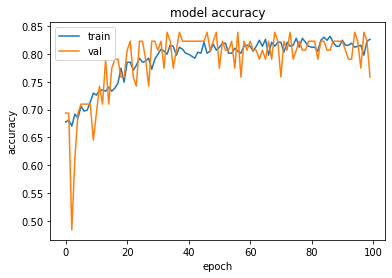

In [28]:
# plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Observations:
Improve on model capacity: 
* if the first layer has 40 nodes, and the second layer has 50 nodes, the accuracy of the model is 83.87. 
* if I changed the first layer to 20 nodes and the second layer to 30 nodes, the accuracy of the model is 83.15. 
* if I changed the first layer to 15 nodes, and the second layer to 25 nodes, the accuracy of the model is 83.90
* if I changed the first layer to 10 nodes, and the second layer to 20 nodes, the accuracy of the model is 81.65. 

So eventually I keep my model as: 15 nodes in the first layer and 25 nodes in the second layer


In [29]:
## If we want to further improve the model capacity and avoid overfitting, let's try to use drop out

model_new = Sequential()

# Add the first layer 
input_layer = Dense(units = 180, activation='relu', input_shape = (n_cols,)) 
model_new.add(input_layer) 

# add dropout
#model_new.add(Dropout(0.5))

# # Add the second layer 
hidden_layer = Dense(units = 180, activation='relu') 
model_new.add(hidden_layer)

# add dropout
model_new.add(Dropout(0.5))

# # Add the output layer
model_new.add(Dense(1, activation='sigmoid'))

# Compile the keras model
model_new.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early_stopping_monitor
# here, we set the number of epochs the model can take without improving rate. 
early_stopping_monitor = EarlyStopping(patience=20)

history_new = model_new.fit(X_train, Y_train, epochs=100, batch_size=5, validation_split= 0.1, callbacks=[early_stopping_monitor], verbose=2)


Epoch 1/100
112/112 - 1s - loss: 1.4362 - accuracy: 0.5950 - val_loss: 0.6093 - val_accuracy: 0.6935 - 582ms/epoch - 5ms/step
Epoch 2/100
112/112 - 0s - loss: 0.8064 - accuracy: 0.6631 - val_loss: 0.5581 - val_accuracy: 0.6774 - 114ms/epoch - 1ms/step
Epoch 3/100
112/112 - 0s - loss: 0.7373 - accuracy: 0.6935 - val_loss: 0.5993 - val_accuracy: 0.6452 - 126ms/epoch - 1ms/step
Epoch 4/100
112/112 - 0s - loss: 0.6676 - accuracy: 0.6344 - val_loss: 0.5722 - val_accuracy: 0.6774 - 154ms/epoch - 1ms/step
Epoch 5/100
112/112 - 0s - loss: 0.6292 - accuracy: 0.6882 - val_loss: 0.5917 - val_accuracy: 0.6935 - 134ms/epoch - 1ms/step
Epoch 6/100
112/112 - 0s - loss: 0.6092 - accuracy: 0.6631 - val_loss: 0.5814 - val_accuracy: 0.6452 - 132ms/epoch - 1ms/step
Epoch 7/100
112/112 - 0s - loss: 0.6136 - accuracy: 0.6828 - val_loss: 0.5953 - val_accuracy: 0.6935 - 188ms/epoch - 2ms/step
Epoch 8/100
112/112 - 0s - loss: 0.5991 - accuracy: 0.7025 - val_loss: 0.5908 - val_accuracy: 0.6129 - 131ms/epoch - 1

Epoch 66/100
112/112 - 0s - loss: 0.4210 - accuracy: 0.8244 - val_loss: 0.4152 - val_accuracy: 0.8065 - 141ms/epoch - 1ms/step
Epoch 67/100
112/112 - 0s - loss: 0.4286 - accuracy: 0.8118 - val_loss: 0.4292 - val_accuracy: 0.8065 - 134ms/epoch - 1ms/step
Epoch 68/100
112/112 - 0s - loss: 0.4396 - accuracy: 0.8190 - val_loss: 0.4160 - val_accuracy: 0.8226 - 146ms/epoch - 1ms/step
Epoch 69/100
112/112 - 0s - loss: 0.4276 - accuracy: 0.8280 - val_loss: 0.3892 - val_accuracy: 0.8226 - 139ms/epoch - 1ms/step
Epoch 70/100
112/112 - 0s - loss: 0.4093 - accuracy: 0.8315 - val_loss: 0.3835 - val_accuracy: 0.8065 - 141ms/epoch - 1ms/step
Epoch 71/100
112/112 - 0s - loss: 0.4223 - accuracy: 0.8100 - val_loss: 0.3754 - val_accuracy: 0.8387 - 140ms/epoch - 1ms/step
Epoch 72/100
112/112 - 0s - loss: 0.4314 - accuracy: 0.8047 - val_loss: 0.3801 - val_accuracy: 0.8226 - 140ms/epoch - 1ms/step
Epoch 73/100
112/112 - 0s - loss: 0.4081 - accuracy: 0.8244 - val_loss: 0.4060 - val_accuracy: 0.8065 - 156ms/e

In [30]:
# evaluate the keras model on training data
_, accuracy = model_new.evaluate(X_train, Y_train)
print('Training Accuracy: %.2f' % (accuracy * 100))

20/20 [==============================] - 0s 895us/step - loss: 0.4401 - accuracy: 0.8194
Training Accuracy: 81.94


In [31]:
_, accuracy = model_new.evaluate(X_test, Y_test)
print('Testing Accuracy: %.2f' % (accuracy * 100))

9/9 [==============================] - 0s 2ms/step - loss: 0.5316 - accuracy: 0.7790
Testing Accuracy: 77.90


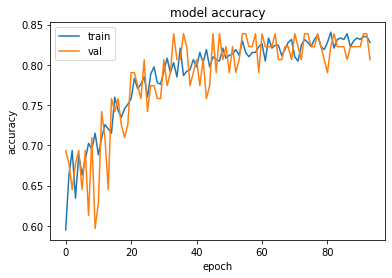

In [32]:
# plot the training accuracy and validation accuracy
plt.plot(history_new.history['accuracy'])
plt.plot(history_new.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Observations:
* if we used 120 nodes in the first layer, and another 120 nodes in the second layer. Without the dropout layer, the training accuracy is 86.45, and the testing accuracy is 81.65.
* if we used the same number nodes in both layer (with dropout layer), the testing accuracy is 82.40 and the training accuracy is 84.52.
* adding a dropout layer could slightly improve the accuracy testing rate and reduce overfitting. 

### Use logistic regression

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_log = logreg.predict(X_test)
acc_log_train = round(logreg.score(X_train, Y_train) * 100, 2)
Y_pred_logit_prob = logreg.predict_proba(X_test)[:, 1]


print("Number of mislabeled points out of a total %d points : %d"
% (X_test.shape[0], (Y_pred_log != Y_test).sum()))

print("testing accuracy rate:", accuracy_score(Y_test, Y_pred_log))


Number of mislabeled points out of a total 267 points : 56
testing accuracy rate: 0.7902621722846442


In [34]:
logreg.classes_[1]

1

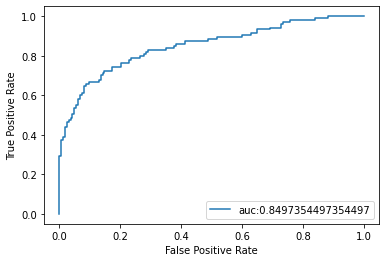

In [35]:
Y_score = logreg.decision_function(X_test)
Y_pred_prob = logreg.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_score, pos_label=logreg.classes_[1])
auc = roc_auc_score(Y_test, Y_pred_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(label="auc:"+str(auc))

Text(0.5, 15.0, 'Predicted label')

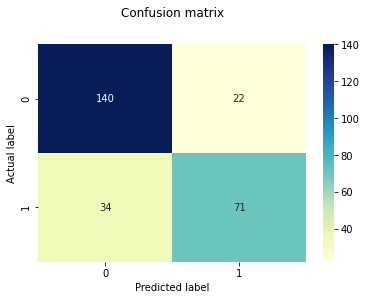

In [36]:
cnf_matrix = confusion_matrix(Y_test, Y_pred_log)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Observations:
* we could see that 34 people were wrongly labelled as "not survived"
* 22 people were wrongly labelled as "survived"

### Use random forest

In [45]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_forest = random_forest.predict(X_test)

In [46]:
random_forest.score(X_train, Y_train)

0.9806451612903225

In [47]:
random_forest.score(X_test, Y_test)

0.8127340823970037

In [48]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(7)

,importance
feature,
Age,0.278
Fare,0.274
Sex,0.267
Pclass,0.071
total_relatives,0.052
Siblings/Spouses Aboard,0.029
Parents/Children Aboard,0.028


In [49]:
#Let's drop the last two features because they have relatively low feature importance
X_train_new = X_train.drop(['Siblings/Spouses Aboard', 'Parents/Children Aboard'], axis=1)
X_test_new = X_test.drop(['Siblings/Spouses Aboard', 'Parents/Children Aboard'], axis=1)

#### Playing around with min sample leaves
Based on Sklearn documentation, min sample leaf refers to "The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. ". If we set min sample leaf to 1, that means the tree can grow really deep. 

In [43]:
min_sample_leaves=[5, 6, 7, 8, 9, 10]
for i in min_sample_leaves:
    forest = RandomForestClassifier(n_estimators=50, n_jobs=-1, class_weight="balanced", min_samples_leaf=i)
    forest.fit(X_train_new, Y_train)
    print(i)
    print("training score:", forest.score(X_train_new, Y_train))
    print("testing score:", forest.score(X_test_new, Y_test))
    print("total depth of decision trees", sum([estimator.get_depth() for estimator in forest.estimators_]))
    print("    ")

5
training score: 0.8774193548387097
testing score: 0.8352059925093633
total depth of decision trees 522
    
6
training score: 0.8709677419354839
testing score: 0.8239700374531835
total depth of decision trees 516
    
7
training score: 0.8612903225806452
testing score: 0.8014981273408239
total depth of decision trees 461
    
8
training score: 0.8629032258064516
testing score: 0.8164794007490637
total depth of decision trees 469
    
9
training score: 0.8612903225806452
testing score: 0.797752808988764
total depth of decision trees 437
    
10
training score: 0.8629032258064516
testing score: 0.8052434456928839
total depth of decision trees 429
    


* From what we could see above, as min sample leaf increases, the depth of tree decreases. 
* when min sample leaf = 8, we could reduce overfitting and also have a testing score of 0.81 (which looks better than when min sample leaf is the other values)

In [61]:
random_forest_n = RandomForestClassifier(n_estimators=50, n_jobs=-1, class_weight="balanced", min_samples_leaf=8)
random_forest_n.fit(X_train_new, Y_train)
Y_pred_forest = random_forest_n.predict(X_test_new)
Y_pred_forest_prob = random_forest_n.predict_proba(X_test_new)[:, 1]

In [62]:
Y_pred_forest_prob.shape

(267,)

In [63]:
#Y_pred_forest_ = Y_pred_forest_prob[:, 1] #grad the second column and 267 rows 

In [64]:
random_forest_n.score(X_train_new, Y_train)


0.8661290322580645

In [65]:
random_forest_n.score(X_test_new, Y_test)

0.8202247191011236

#### As we could see, the testing score slightly increases after we dropped the last two features 

### Model Evaluation 

Let's compare random forest and logistic regression 

In [66]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_forest).ravel()

In [67]:
(tn, fp, fn, tp)

(139, 23, 25, 80)

* 139 passengers were correctly classified as "not survived"
* 23 passengers were correctly classified as "survived"
* 25 passengers were falsely classified as "survived"
* 80 passengers were falsely classified as "not survived"

Text(0.5, 15.0, 'Predicted label')

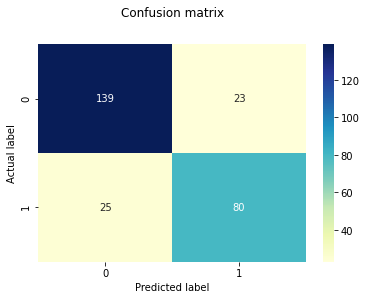

In [68]:
cnf_matrix = confusion_matrix(Y_test, Y_pred_forest)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

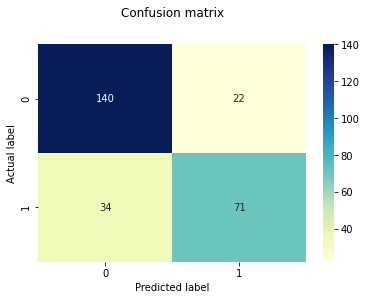

In [58]:
cnf_matrix = confusion_matrix(Y_test, Y_pred_log)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

random forest did slightly better in recognizing true positive. The false positive rate of the logistic regression is higher than random forest. 

In [59]:
##### Plotting
def makeSepPlot( varTrue, varPred, title='Classifier Separation', yscale='log', threshold=0.5, pdf=None):

    '''
    Make Classifier seperation plot. Input parameters are: 
      varPred : Required. Variable for model prediction 
      varTrue : Required. Variable for source of truth - actual bundle
      title   : Optional. Title for plot.
    '''
    
    bins =  np.linspace(0, 100, 41)
    plt.hist( varPred[ varTrue == 1 ] *100 , color='red'  , alpha = 0.7, bins = bins, label='Truely Bundled'    , lw = 0)
    plt.hist( varPred[ varTrue == 0 ] *100, color='blue' , alpha = 0.5, bins = bins, label='Truely Not Bundled', lw = 0)
    plt.axvline(threshold*100, color='k', linestyle='dashed', linewidth=1)
    plt.yscale(yscale)
    plt.xlabel('Probability of Being Bundled')
    plt.ylabel('Counts')
    plt.ylim(bottom=0.9)
    plt.title ( title )
    plt.legend()
    if pdf is not None: 
        pdf.savefig()
    plt.show()


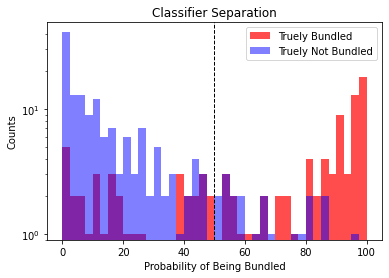

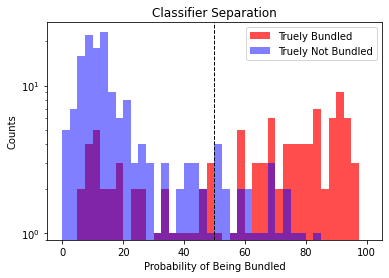

In [60]:
makeSepPlot(Y_test, Y_pred_forest_prob, yscale="log")
makeSepPlot(Y_test, Y_pred_logit_prob, yscale="log")

* our false positive in general is lower than false negative. 

### Hypter Parameter Tuning

In [72]:
 #### Create the random grid

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 110, num = 11)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8, 16, 32, 64]
# Minimum number of samples required at each leaf node
min_samples_leaf = [6, 8, 11, 13, 15]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [73]:
rf_random = RandomizedSearchCV(estimator = random_forest_n, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, n_jobs = -1)

In [74]:
rf_random.fit(X_train,Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    min_samples_leaf=8,
                                                    n_estimators=50,
                                                    n_jobs=-1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 15, 26, 36, 47, 57, 68,
                                                      78, 89, 99, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [6, 8, 11, 13, 15],
                                        'min_samples_split': [2, 4, 8, 16, 32,
                                                              64],
                                        'n_estimators': [20, 40, 60, 80, 100,
                                                    

In [75]:
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 16,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 78,
 'bootstrap': True}

### use the best params

In [77]:
#random_forest_n2 = RandomForestClassifier(n_estimators=80, max_features='auto', n_jobs=-1, min_samples_split=16, min_samples_leaf=2, max_depth=99, bootstrap=True)
random_forest_n2 = RandomForestClassifier(n_estimators=20, max_features='sqrt', n_jobs=-1, min_samples_split=16, min_samples_leaf=6, max_depth=78, bootstrap=True)
random_forest_n2.fit(X_train_new, Y_train)
Y_pred_v2 = random_forest_n2.predict(X_test_new)

In [79]:
print("training score:", random_forest_n2.score(X_train_new, Y_train))

training score: 0.8741935483870967


In [80]:
print("testing score:", random_forest_n2.score(X_test_new, Y_test))

testing score: 0.8352059925093633


#### We could see that the testing score got increased to 0.83

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. (Sklearn document)

In [81]:
print("Precision:", precision_score(Y_test, Y_pred_v2))

Precision: 0.8210526315789474


Our model can correctly predict a passenger's survival 82% of the time. 

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. (Sklearn document)

In [82]:
print("Recall:", recall_score(Y_test, Y_pred_v2))

Recall: 0.7428571428571429


Our model can correctly find 74% of the people who actually surivived. 

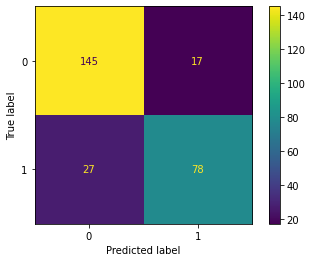

In [83]:
cm = confusion_matrix(Y_test, Y_pred_v2)
cm_display = ConfusionMatrixDisplay(cm).plot()

### Observations:
* 27 people were wrongly classified as "survived"
* 17 people were wrongly classified as "not survived"

### Precision Recall Curve

source: https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8

In [84]:
random_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

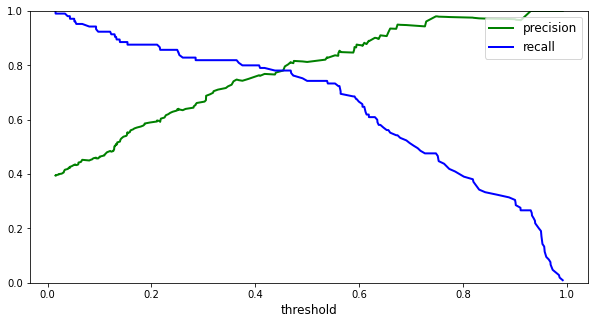

In [92]:
Y_scores = random_forest_n2.predict_proba(X_test_new)
Y_scores = Y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_test, Y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "g-", label="precision", linewidth=2)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=2)
    plt.xlabel("threshold", fontsize=12)
    plt.legend(loc="upper right", fontsize=12)
    plt.ylim([0, 1])

plt.figure(figsize=(10, 5))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

predict_proba: Predict class probabilities of the input samples X. This function will return the class probability of input sample

In [95]:
Y_scores

array([0.72919833, 0.34734472, 0.13865978, 0.2108765 , 0.18688513,
       0.15162195, 0.21601799, 0.63040144, 0.49985707, 0.18646896,
       0.5887611 , 0.93596857, 0.14216852, 0.25176866, 0.09737118,
       0.12800003, 0.90173346, 0.09328247, 0.30490921, 0.15370469,
       0.26023224, 0.12841657, 0.32804194, 0.28498458, 0.61238229,
       0.95112402, 0.28718275, 0.80178757, 0.05946877, 0.05922088,
       0.7047703 , 0.76853869, 0.88874237, 0.74790315, 0.38649831,
       0.95741502, 0.30490921, 0.25366294, 0.13182496, 0.05837676,
       0.21676742, 0.11430119, 0.31958273, 0.03342206, 0.14604076,
       0.1970151 , 0.95741502, 0.04298088, 0.10019522, 0.47334573,
       0.14216852, 0.05153505, 0.28512645, 0.45374487, 0.04932605,
       0.10001762, 0.60994305, 0.01540636, 0.46917907, 0.04013898,
       0.56432524, 0.13958374, 0.01803794, 0.09831301, 0.15973651,
       0.59109199, 0.03342206, 0.90028714, 0.04309509, 0.90122155,
       0.40913066, 0.12811666, 0.47427686, 0.95024587, 0.34323